In [1]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import utilities
import features
import pitchspace

# set path to repo
PATH = "/home/max/ET-TI/Masterarbeit/"

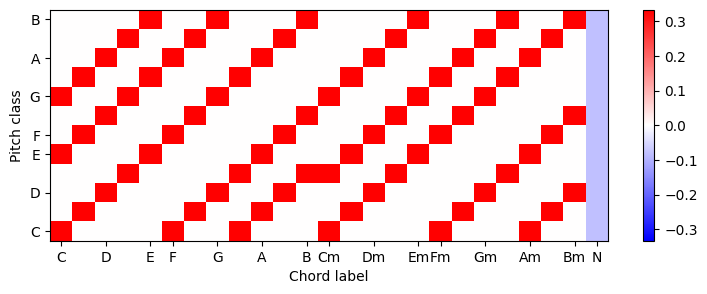

In [2]:
# plot Templates
FILENAME = "latex/figures/templates.png"
templates,labels = utilities.createChordTemplates(template_type="majmin")
fig,ax = plt.subplots(figsize=(9,3))
img = librosa.display.specshow(templates,ax=ax, cmap="bwr",vmin=-np.max(templates),vmax=np.max(templates))
xticklabels = ["C","D","E","F","G","A","B","Cm","Dm","Em","Fm","Gm","Am","Bm","N"]
xticks = [0,2,4,5,7,9,11,12,14,16,17,19,21,23,24]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_yticks(xticks[:7])
ax.set_yticklabels(xticklabels[:7])
ax.set_ylabel("Pitch class")
ax.set_xlabel("Chord label")
cbar = fig.colorbar(img, ax=ax)
fig.savefig(PATH+FILENAME,dpi=200)


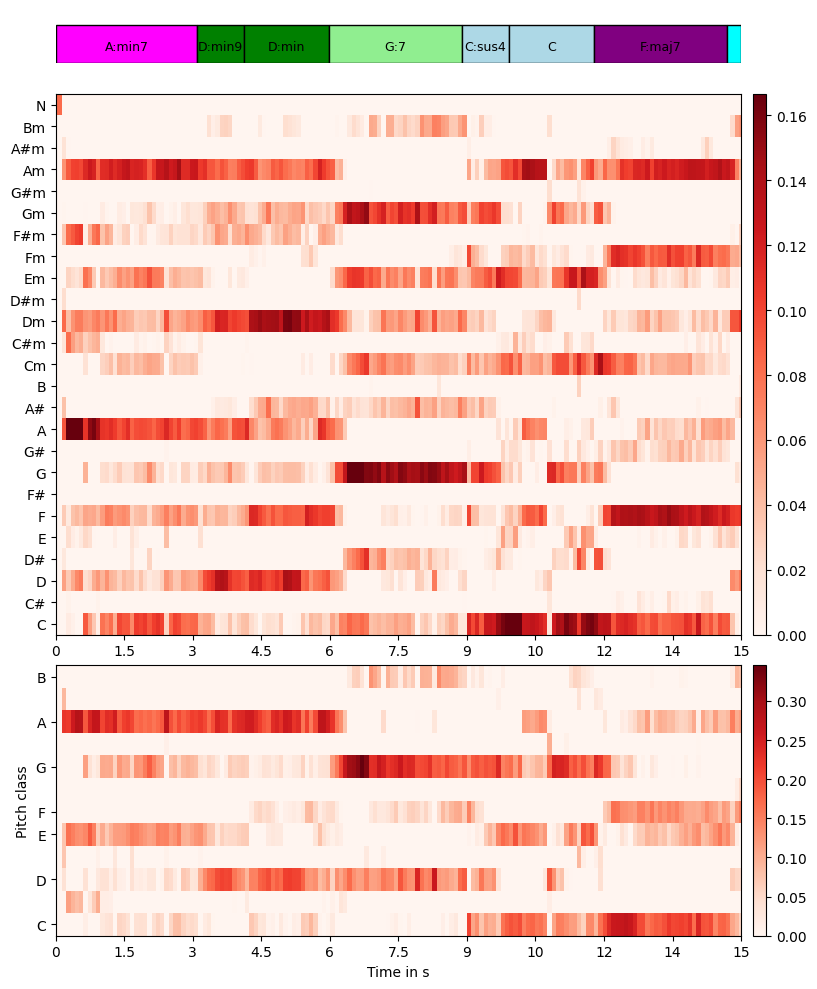

In [3]:
## Correlation Matrix
FILENAME = "latex/figures/template_recognition_result_correlation.png"

chroma_type = "cqt"
title = "11_-_Abbey_Road/09_-_You_Never_Give_Me_Your_Money"
gt = utilities.loadAnnotations(PATH+f"mirdata/beatles/annotations/chordlab/The Beatles/{title}.lab")
t,sig = utilities.loadAudio(PATH+f"mirdata/beatles/audio/{title}.wav",t_stop=30)
t_chroma, chroma = features.crpChroma(sig,nCRP=30)
templates,labels = utilities.createChordTemplates(template_type="majmin") # majmin ,triads,triads_extended, majmin_sevenths
correlation = np.matmul(templates.T,chroma)

fig,((ax0,ax00),(ax1,ax11),(ax2,ax22)) = plt.subplots(3,2,height_ratios=(1,10,5),width_ratios=(50,1),figsize=(8.27,10))
# plot Annotations
ax00.set_axis_off()
utilities.plotChordAnnotations(ax0,gt,(0,15))

# plot correlation 
if chroma_type == "cqt":
    cmap = "Reds"
    vmin = 0
    vmax = np.max(correlation)
else:
    cmap = "bwr"
    vmin = -np.max(correlation) 
    vmax = np.max(correlation) 
img = librosa.display.specshow(correlation, ax=ax1, x_coords=t_chroma.T,x_axis='time',
                                vmin=vmin,vmax=vmax,cmap=cmap)
yticklabels = ["C","C#","D","D#","E","F","F#","G","G#","A","A#","B","Cm","C#m","Dm","D#m","Em","Fm","F#m","Gm","G#m","Am","A#m","Bm","N"]
yticks = np.arange(0,25,1)
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels) 
ax1.set_xlim([0,15])
ax1.set_xlabel("")
# plot chromagram  
fig.colorbar(img,cax=ax11,cmap="bwr")
img = utilities.plotChromagram(ax2,t_chroma,chroma,chroma_type=chroma_type)
fig.colorbar(img,cax=ax22)
ax2.set_xlim([0,15])
fig.tight_layout(h_pad=0.5,w_pad=0.2)
fig.savefig(PATH+FILENAME,dpi=200)

circular Pitch space system

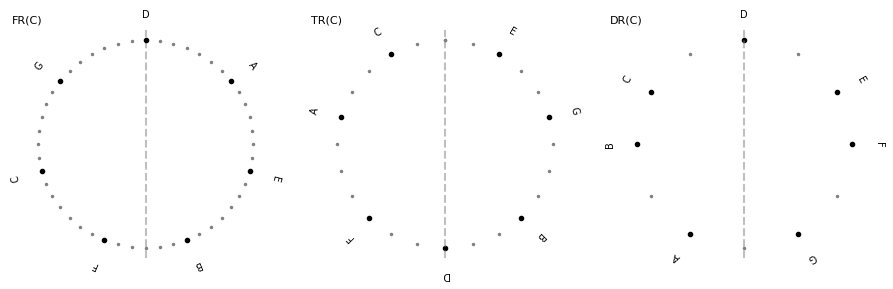

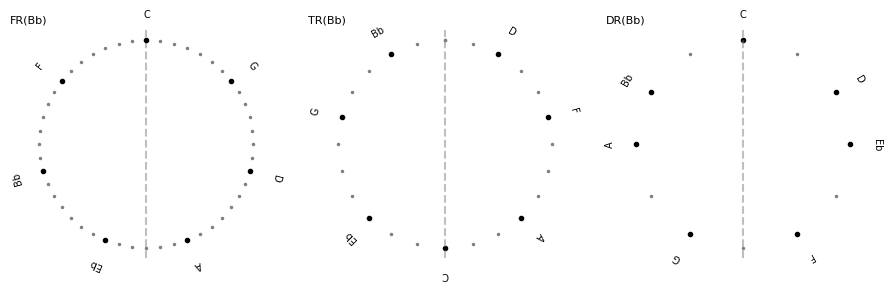

In [8]:
fig,(ax0,ax1,ax2) = plt.subplots(1,3,figsize=(9,3))
pitchspace.plotCircleFR(ax0,0)
pitchspace.plotCircleTR(ax1,0,False)  
pitchspace.plotCircleDR(ax2,0)
fig.tight_layout(w_pad=2)
fig,(ax0,ax1,ax2) = plt.subplots(1,3,figsize=(9,3))
pitchspace.plotCircleFR(ax0,3)
pitchspace.plotCircleTR(ax1,3,False)  
pitchspace.plotCircleDR(ax2,3)
fig.tight_layout(w_pad=2)